<a href="https://colab.research.google.com/github/deltorobarba/chemistry/blob/main/H2O_hartreefock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Water Molecule (H₂O) - Hartree-Fock SCF**

In [1]:
!pip install pyscf matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 13.2 MB/s eta 0:00:00


converged SCF energy = -76.0267936449739


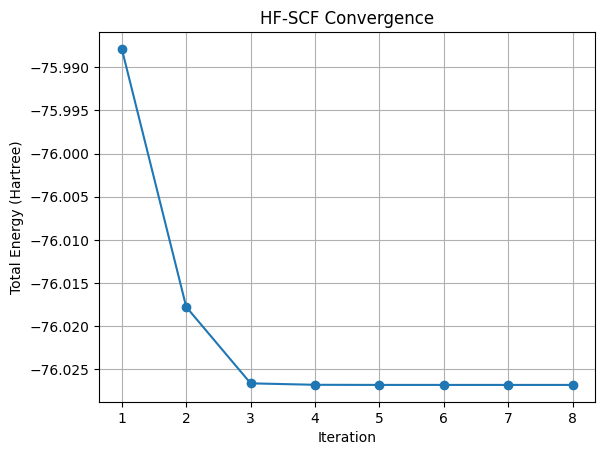

HF-SCF energy for H2O: -76.02679364497389 Hartree


In [14]:
# Hartree-Fock SCF (Slater Determinant)
# First, ensure you have the PySCF package installed
from pyscf import gto, scf
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the molecule using gto.M() function
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a HF-SCF calculation using Restricted Hartree-Fock (RHF) method

# scf.RHF for a restricted Hartree-Fock calculation for a closed-shell system (H₂O)
mf = scf.RHF(mol)

# Store convergence data
conv_data = []

# Callback function to collect convergence information
# (callback function captures energy values at each iteration to track the convergence process)
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform HF calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot the convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()

print(f"HF-SCF energy for H2O: {energy} Hartree")

In [3]:
# Hartree-Fock Hamiltonian includes electron-electron interaction in form of exchange integrals.
# In Hartree-Fock theory, electrons are described using a Slater determinant of single-particle orbitals,
# and Hamiltonian includes terms for the kinetic energy, electron-nuclear attraction, and electron-electron repulsion

from pyscf import gto, scf

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Get the core Hamiltonian (kinetic + nuclear attraction)
core_hamiltonian = mf.get_hcore()

# Get the Fock matrix (core Hamiltonian + electron-electron interaction terms)
fock_matrix = mf.get_fock()

converged SCF energy = -76.0267936449739


In [4]:
print("Core Hamiltonian matrix (Hcore):\n", core_hamiltonian)

Core Hamiltonian matrix (Hcore):
 [[-3.30266742e+01  7.86885373e+00 -5.92940699e+00  0.00000000e+00
   0.00000000e+00 -3.06478075e-02  0.00000000e+00  0.00000000e+00
  -5.73180346e-03  0.00000000e+00  0.00000000e+00 -3.84923952e-04
   0.00000000e+00  3.35894308e-03 -1.62279641e+00 -2.10585214e+00
   0.00000000e+00  2.68023438e+00  2.07311975e+00 -1.62279641e+00
  -2.10585214e+00  0.00000000e+00 -2.68023438e+00  2.07311975e+00]
 [ 7.86885373e+00 -1.02785814e+01 -5.04442940e+00  0.00000000e+00
   0.00000000e+00 -1.70475422e-01  0.00000000e+00  0.00000000e+00
  -1.15911214e-01  0.00000000e+00  0.00000000e+00 -9.37449906e-03
   0.00000000e+00  8.18042331e-02 -2.14274568e+00 -2.44231854e+00
   0.00000000e+00  2.30454912e+00  1.75477703e+00 -2.14274568e+00
  -2.44231854e+00  0.00000000e+00 -2.30454912e+00  1.75477703e+00]
 [-5.92940699e+00 -5.04442940e+00 -7.61956807e+00  0.00000000e+00
   0.00000000e+00 -1.77925761e-01  0.00000000e+00  0.00000000e+00
  -2.42181267e-01  0.00000000e+00  0.000

**Core Hamiltonian matrix**represents the one-electron part of the molecular Hamiltonian, which consists of the kinetic energy of the electrons and the electrostatic attraction between the electrons and the nuclei. **The Core Hamiltonian does not include electron-electron interactions, which are handled separately.**Core Hamiltonian matrix is sum of two key terms:
1. **Kinetic Energy Operator (T)**:
   - This represents the kinetic energy of the electrons in the system.
   - It accounts for how fast an electron is moving in a given orbital.
   
2. **Nuclear Attraction Operator (V)**:
   - This term represents the potential energy due to the attraction between the negatively charged electrons and the positively charged nuclei.
   - It captures how strongly an electron is attracted to the nucleus of the atoms in the molecule.

Mathematically, the Core Hamiltonian matrix $ H_{\text{core}} $ is expressed as:
$
H_{\text{core}} = T + V
$
Where:
- \( T \): Kinetic energy of the electron.
- \( V \): Nuclear-electron attraction potential.

Construction of the Core Hamiltonian Matrix:
In practice, the matrix elements of the Core Hamiltonian, $ H_{\text{core}} $, are computed in a chosen basis set, often involving atomic orbitals (e.g., Gaussian-type orbitals). Each matrix element $ H_{\text{core}}^{ij} $ corresponds to the interaction between two basis functions $ \phi_i $ and $ \phi_j $ and is calculated as:
$
H_{\text{core}}^{ij} = \langle \phi_i | T + V | \phi_j \rangle
$
Here, $ \langle \phi_i | T | \phi_j \rangle $ is the kinetic energy matrix element, and $ \langle \phi_i | V | \phi_j \rangle $ is the nuclear attraction matrix element.

The **Core Hamiltonian** represents the part of the system that describes the behavior of electrons under the influence of the nuclear charges and their own kinetic energy. It is often used as the starting point in the Hartree-Fock method. The full Fock matrix, which also includes electron-electron repulsion (Coulomb and exchange terms), is built upon the Core Hamiltonian.

- **No electron-electron interactions**: The Core Hamiltonian only accounts for the kinetic energy of the electrons and their interaction with the nuclei. Electron-electron interactions are added later via the Coulomb and exchange terms in the Fock matrix.
- **Starting point for the Fock matrix**: In Hartree-Fock theory, the Fock matrix is built by adding electron-electron interaction terms (Coulomb and exchange) to the Core Hamiltonian.
- **Symmetry**: The Core Hamiltonian matrix is typically symmetric (i.e., \( H_{\text{core}}^{ij} = H_{\text{core}}^{ji} \)).

Relation to the Fock Matrix: in the **Hartree-Fock** method, the Fock matrix \( F \) is obtained by adding the two-electron interaction terms (electron repulsion and exchange) to the Core Hamiltonian:
$
F = H_{\text{core}} + J - K
$
Where:
- \( J \) is the Coulomb matrix (electron-electron repulsion).
- \( K \) is the exchange matrix (arising due to the antisymmetry of the wavefunction).

> Thus, the Core Hamiltonian provides the **foundation** upon which the total energy matrix is built by adding electron-electron interaction effects.

Physical Meaning:
- **Kinetic Energy**: Each electron moves in a cloud of probability, and the kinetic energy part of the Core Hamiltonian accounts for this motion.
- **Electron-Nuclear Attraction**: Electrons are attracted to the positively charged nuclei, and the nuclear attraction term describes how much potential energy is gained by this attraction.

In summary, the **Core Hamiltonian matrix** is the one-electron part of the molecular Hamiltonian, describing how electrons interact with the nuclei and their own kinetic energy. It serves as the starting point for constructing the full Fock matrix in quantum chemistry calculations.

In [5]:
print("Fock Matrix (Hartree-Fock Hamiltonian):\n", fock_matrix)

Fock Matrix (Hartree-Fock Hamiltonian):
 [[-2.05503070e+01  4.42448190e+00 -3.95660733e+00  9.36848178e-18
  -6.17317612e-17 -2.41662208e-02  1.46404643e-19  1.27664806e-17
  -6.01764295e-03  3.98695416e-18 -4.27239183e-17 -5.01310614e-05
  -1.89721026e-17 -1.20872661e-03 -1.09323297e+00 -1.41449454e+00
  -1.81100453e-18  1.78970445e+00  1.38345313e+00 -1.09323297e+00
  -1.41449454e+00 -3.24780138e-18 -1.78970445e+00  1.38345313e+00]
 [ 4.42448190e+00 -1.77436135e+00 -3.63157077e-01  8.21435505e-17
   6.27753058e-17 -4.06665759e-02  3.95879197e-17  4.52247831e-17
  -6.01372077e-02  1.76338999e-17 -8.48151031e-17 -6.84863507e-03
  -1.33958179e-17  8.57775181e-02 -4.45334301e-01 -4.42871045e-01
   1.70130906e-17  4.43589556e-02  3.68621936e-02 -4.45334301e-01
  -4.42871045e-01  1.00049213e-17 -4.43589556e-02  3.68621936e-02]
 [-3.95660733e+00 -3.63157077e-01 -1.81678753e+00  2.91154512e-17
  -6.96328845e-17 -9.49263136e-02  2.05772000e-17  5.96311195e-17
  -1.76260013e-01  1.61281202e-17

Fock matrix approximates many-electron wavefunction of a system (H₂O), i.e. approximates interactions between electrons in a system to find an optimal set of orbitals. This matrix gives you a snapshot of the electronic structure of the water molecule, including the energies of molecular orbitals and how they interact or mix.

1. **Fock Matrix Definition**:
   The Fock matrix represents the Hamiltonian (energy operator) of the system, taking into account both the kinetic energy of the electrons and their interactions with the nuclei and each other, within the approximation used by Hartree-Fock theory.

2. **Matrix Elements**:
   - Each element \( F_{ij} \) in the matrix corresponds to the interaction between molecular orbitals \( i \) and \( j \). Diagonal elements \( F_{ii} \) represent the energy of a specific molecular orbital (one-electron energy), while the off-diagonal elements \( F_{ij} \) represent the interaction or coupling between different orbitals \( i \) and \( j \).
   
3. **Orbital Basis**:
   This matrix is constructed in a specific basis of molecular orbitals (often linear combinations of atomic orbitals, or LCAO). For a water molecule, you would typically have contributions from the oxygen's 2s, 2p orbitals and the hydrogen's 1s orbitals.

4. **Interpretation of Diagonal Terms**:
   The diagonal terms (e.g., \( F_{ii} \)) indicate the energy associated with each molecular orbital, providing insights into how strongly the electrons are bound to each orbital.

5. **Off-diagonal Terms**:
   The off-diagonal elements (e.g., \( F_{ij} \) with \( i \neq j \)) represent the coupling or overlap between orbitals, describing how electrons in one orbital influence another orbital. These terms are crucial in determining how orbitals mix to form the final molecular orbitals.

6. **Units**:
   The values in the matrix are in Hartrees (atomic units of energy). Typically, 1 Hartree = 27.2114 eV, so you can convert these to electronvolts for more intuitive energy values.

Practical Insight for the Water Molecule:
- **Diagonal Terms**: These can be roughly interpreted as the energies of molecular orbitals. For example, a large negative value like `-20.55` in the top left suggests a very strongly bound electron in that orbital.
- **Off-diagonal Terms**: The non-zero off-diagonal elements indicate how the molecular orbitals are mixing. Larger absolute values suggest stronger interactions between the orbitals.
  
- **Symmetry Considerations**: For water, symmetry may reduce the number of unique elements in the matrix, and certain elements might be near zero due to symmetry constraints (like the nearly zero elements on the edges of the matrix).

In [22]:
print("Fock Matrix Shape:", fock_matrix.shape)
print("Fock Matrix Size:", fock_matrix.size)
print("Fock Matrix Dimension:", fock_matrix.ndim)
print("Fock Matrix Trace:", np.trace(fock_matrix))
print("Fock Matrix Determinant:", np.linalg.det(fock_matrix))
print("Fock Matrix Rank:", np.linalg.matrix_rank(fock_matrix))

Fock Matrix Shape: (24, 24)
Fock Matrix Size: 576
Fock Matrix Dimension: 2
Fock Matrix Trace: -5.927529968220272
Fock Matrix Determinant: -0.37996376173748425
Fock Matrix Determinant: 24


* **Shape**: corresponds to 24 basis functions (molecular orbitals) used to describe water molecule (H₂O):
  * Contributions from 1s orbitals of the hydrogen atoms
  * Contributions from the oxygen atom's $2s, 2p_x, 2p_y$, and $2p_z$ orbitals.
  * Additional basis functions might arise from higher-order functions like polarization or diffuse functions depending on the level of theory or the basis set used (e.g., STO-3G, 6-31G, etc.)
* **Size**: 24 * 24 = 576.
  * All interactions between 24 orbitals (both diagonal and off-diagonal) are captured.
  *  Fock matrix is constructed to represent pairwise interactions between orbitals as N x N matrix. Each element $F_ij$ corresponds to interaction between orbital i and orbital j.
* **Trace**: total sum of diagonal elements (orbital energies) is negative
  * diagonal elements correspond to one-electron energies of molecular orbitals
  * In a stable molecule like water, most of electrons occupy bound molecular orbitals with negative energies (relative to a free electron), hence a negative trace is expected.
  * magnitude of trace depends on the specific molecular orbitals' energy levels, which are influenced by the electron-nuclear and electron-electron interactions in the Hartree-Fock approximation.
* **Determinant**: insights into matrix's invertibility and system's stability.
  * A determinant close to zero (but not exactly zero) typically suggests that the matrix is close to being singular, meaning it is almost non-invertible. This could imply that some of the molecular orbitals are nearly degenerate or that the system is on the verge of instability.
  * A negative determinant indicates a specific symmetry property or interaction of the molecular orbitals, but the exact physical meaning is more abstract in this context.
  * This value suggests that there are significant interactions between the orbitals, but the system remains stable, as the determinant is not zero.
* **Rank**: = number of linearly independent rows or columns.
  * Since rank is 24 (equal to number of rows/columns), it means that all 24 molecular orbitals are linearly independent, and none are redundant.
  * This is expected in a typical Hartree-Fock calculation where each basis function represents a unique molecular orbital.

The results reflect the stability and complexity of the electronic structure of the water molecule within the Hartree-Fock framework, showing that the orbitals are well-defined, independent, and that the system is energetically stable.


Why are the results the way they are?
* **Basis Set**: The properties of the Fock matrix (its trace, determinant, shape) are heavily influenced by the choice of the basis set used in your calculation. A more complex basis set (with more basis functions) would result in a larger Fock matrix, while a minimal basis set would lead to a smaller one.
* **Orbital Energies**: The negative trace reflects the fact that the molecular orbitals are predominantly bonding or non-bonding, which is typical for a stable molecule like water, where the electrons are in lower energy states.
* **Coupling and Stability**: The determinant being non-zero indicates that the Fock matrix is invertible, meaning the system is stable in the Hartree-Fock approximation. The negative determinant suggests complex electron interactions, but the system is stable because the value is not close to zero.

In [ ]:
# Retrieve Hartree-Fock orbitals (related to the Slater determinant)

from pyscf import gto, scf

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Get the molecular orbitals (which form the Slater determinant)
mo_coeff = mf.mo_coeff  # Coefficients of the molecular orbitals in the atomic basis
mo_energy = mf.mo_energy  # Orbital energies

print("Molecular Orbital Coefficients (MO coefficients):\n", mo_coeff)
print("Molecular Orbital Energies:\n", mo_energy)

converged SCF energy = -76.0267936449739
Molecular Orbital Coefficients (MO coefficients):
 [[ 1.00089979e+00 -8.21604151e-03 -4.59873169e-16  2.16305736e-03
   1.77310835e-16 -5.20574216e-02 -1.79433495e-15 -6.81963867e-15
  -6.51033846e-02  3.14639080e-03 -4.70072965e-16  8.44225813e-15
   2.02016030e-01  1.76844600e-15 -7.29782654e-17 -7.24314862e-01
   1.94589399e-14 -3.81342580e-14  2.78505588e-01  5.37691872e-19
  -1.39537358e-16 -8.42916924e-02 -1.42425038e-01 -6.72944582e-15]
 [ 1.17545240e-03  4.42883335e-01  1.60868481e-16 -1.50393950e-01
   3.21845420e-16  7.26049469e-02 -1.80131319e-14 -2.40018767e-14
  -2.55809190e-01  1.14706356e-01 -7.36025172e-16  1.80108478e-14
   5.29322337e-01  4.58190437e-15 -1.77880743e-16 -1.59283979e+00
   4.26834927e-14 -9.53089205e-14  7.29453105e-01  2.63177407e-18
  -3.27841898e-16 -1.54240789e-01 -1.75143749e-01 -1.07782110e-14]
 [-2.66588259e-03  3.75739337e-01  4.56635226e-15 -3.49801235e-01
  -9.80281441e-16  1.00273972e+00 -4.20599845e-1

In [ ]:
# extract and display the occupied molecular orbitals, which are used to construct the Slater determinant

from pyscf import gto, scf
import numpy as np

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol)
mf.kernel()

# Get the molecular orbital coefficients
mo_coeff = mf.mo_coeff

# Get the occupation numbers (2 for occupied orbitals in closed-shell RHF)
mo_occ = mf.mo_occ

# Identify the indices of occupied orbitals
occupied_indices = np.where(mo_occ > 0)[0]

# Extract the coefficients of the occupied molecular orbitals
occupied_mo_coeff = mo_coeff[:, occupied_indices]

print("Occupied Molecular Orbital Coefficients:")
print(occupied_mo_coeff)

converged SCF energy = -76.0267936449737
Occupied Molecular Orbital Coefficients:
[[ 1.00089979e+00 -8.21604151e-03  8.29451957e-16  2.16305736e-03
  -8.75919013e-17]
 [ 1.17545240e-03  4.42883335e-01  1.55779901e-15 -1.50393950e-01
   1.41059457e-16]
 [-2.66588259e-03  3.75739337e-01 -7.18332860e-15 -3.49801235e-01
   8.64808787e-16]
 [ 1.66578667e-18  2.01920161e-16 -1.33530409e-16  2.10476337e-15
   6.31170514e-01]
 [-1.13269290e-17 -1.60884816e-16  4.89970411e-01  3.61253806e-16
  -4.85935742e-16]
 [ 1.76288221e-03  7.88241662e-02 -1.98431499e-16  5.45487762e-01
  -1.27992042e-15]
 [-5.40865302e-19  4.92075518e-17 -3.54341460e-16  1.42256753e-15
   4.95654516e-01]
 [ 1.34587986e-17  3.56741186e-16  2.21871797e-01  1.32224361e-15
   4.02871797e-16]
 [-4.83847858e-04 -1.30882003e-02 -3.99519702e-15  3.65342068e-01
  -1.85252064e-15]
 [ 1.83316969e-19 -2.37354809e-19 -1.88079018e-17 -6.82025867e-18
  -9.07402778e-17]
 [-6.43098879e-18 -1.21418178e-16  2.68096298e-02  2.07158576e-16
  